In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load data
userDF = pd.read_csv('takehome_users.csv', parse_dates=[1, 5], encoding = "cp1252")
engagementDF = pd.read_csv('takehome_user_engagement.csv', index_col='time_stamp', parse_dates=True, encoding="cp1252")

In [3]:
userDF.rename(columns={'object_id':'user_id'}, inplace=True)

In [4]:
userDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
engagementDF.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [6]:
engagementDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


In [7]:
engagementDF.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [8]:
# Isolate users who are considered to be "active" using rolling window
engagementDF['7DvisitCount'] = engagementDF.groupby('user_id')['visited'].transform(lambda x: x.rolling(window='7D').count())
activeDF = engagementDF.groupby('user_id')['7DvisitCount'].max()

In [9]:
# Add target featue to main dataset
userDF['adopted'] = 0
userDF['adopted'].loc[userDF.user_id.isin(activeDF.index[activeDF >= 3])] = 1

In [10]:
# Check to make sure the values were added correctly
activeDF[activeDF >= 3].shape, userDF.loc[userDF.adopted != 0, :].shape

((1602,), (1602, 11))

In [11]:
userDF.head(15)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1387424226,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1356009872,0,1,37,NaN,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1401833283,1,1,318,4143.0,1


In [12]:
userDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted                     12000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)


In [13]:
# Fill null values in last_session_creation_time with creation_time values, since these users never logged in.
userDF['last_session_creation_time'] = userDF['last_session_creation_time'].fillna(userDF['creation_time'])

# Fill null values in invited_by_user_id with 0, since these users where not invited by anyone
userDF['invited_by_user_id'] = userDF['invited_by_user_id'].fillna(0)

In [14]:
# Drop unnecessary columns
userDF.drop(columns=['creation_time', 'last_session_creation_time', 'email', 'name'], inplace=True)

In [15]:
# Create dummy variables for creation_source categories
userDF = pd.get_dummies(userDF, columns=['creation_source'], drop_first=False, dtype=int)

I chose to not remove the first category from the new columns since this data is not going to be used for modeling.

In [16]:
userDF.head()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,10803.0,0,1,0,0,0,0
1,2,0,0,1,316.0,1,0,1,0,0,0
2,3,0,0,94,1525.0,0,0,1,0,0,0
3,4,0,0,1,5151.0,0,1,0,0,0,0
4,5,0,0,193,5240.0,0,1,0,0,0,0


<AxesSubplot:>

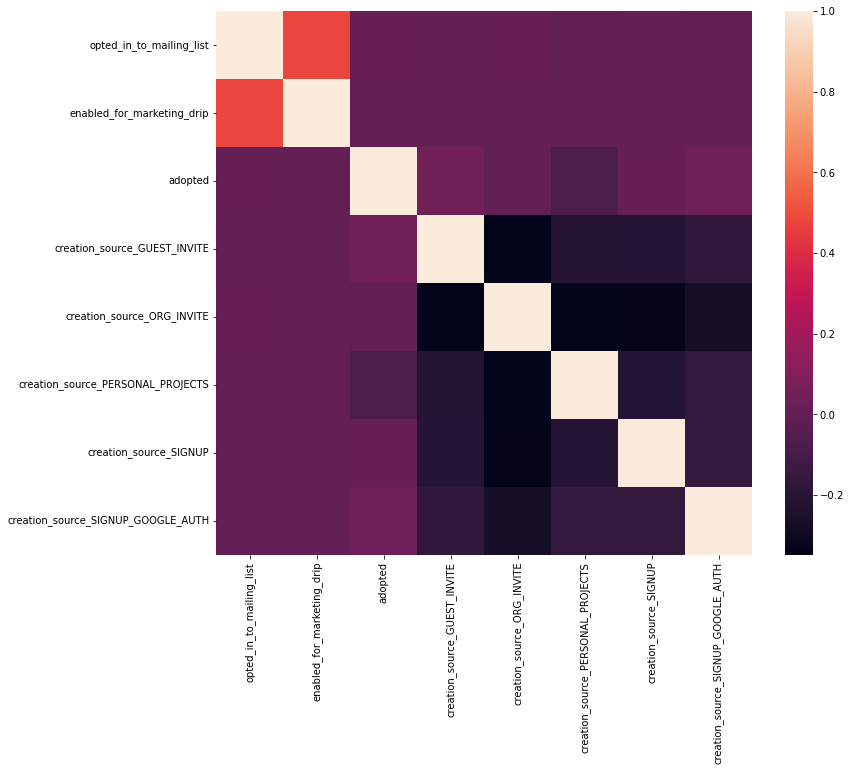

In [17]:
# Heatmap of numerical features
userDFnumeric = userDF.drop(columns=['user_id', 'org_id', 'invited_by_user_id'])
plt.figure(figsize=(12,10))
sns.heatmap(userDFnumeric.corr())

This heatmap isn't too helpfull. The only valuable insight is that users who create accounts for personal projects tend to be less likey to adopt.

In [51]:
# Now use logistic regerssion to determine which numeric features have the greatest impact on adoption.

# Drop the generic signup field creation_source_SIGHNUP feature to use as base value
exog = userDFnumeric.drop(columns=['creation_source_SIGNUP', 'adopted'])
endog = userDFnumeric['adopted']

In [50]:
exog = sm.add_constant(exog)

clf = sm.Logit(endog, exog)
res = clf.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.388840
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                adopted   No. Observations:                12000
Model:                          Logit   Df Residuals:                    11993
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                 0.01055
Time:                        15:13:48   Log-Likelihood:                -4666.1
converged:                       True   LL-Null:                       -4715.8
Covariance Type:            nonrobust   LLR p-value:                 3.170e-19
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.8257      0.065    

Based on the regeression results it seems like the most impactful feature is the creaton source for each account. Surprisingly neither of the coefficients for the mailing list or marketing drip are significant, indicating that we cannot say they have a meaningful impact on adoption. Similarly a creation source of Org Invite signup is not significant. The creation source of Personal Projects, Guest Invite, and Google signup are all significant at 95%. Based on these results, we can say the most impactful feature in the given data is the method of signup. This makes a lot of sense, since the method of signup will give some indication of what the account is being created for.